## Importing Neccessary Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## Loading Dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

## Data Preprocessing

#### 1. Checking Duplcates

In [7]:
sum(train.duplicated())

0

In [8]:
print('Number of duplicated data in training set: ', sum(train.duplicated()))
print('Number of duplicated data in testing set: ', sum(test.duplicated()))

Number of duplicated data in training set:  0
Number of duplicated data in testing set:  0


#### 2. Missing Values

In [9]:
train.isna()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7349,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7350,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
train.isna().values.sum()

0

#### 3. Checking for class imbalance

In [11]:
# plt.figure(figsize=(10, 8))
# plt.title('Barplot of Activity')
# sns.countplot(train.Activity, order = train.Activity.value_counts().index)
# plt.xticks(rotation = 30)
# plt.show()
# There is almost same number of observation across all six activities so this data does not have class imbalance problem.

#### 4. Exploratory data analysis

In [12]:
# What features are there?

train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [13]:
"tBodyAcc-mean()-X".split('-')[0].split('(')[0]

'tBodyAcc'

In [14]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [15]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient = "index")

,0
tBodyAcc,40
tGravityAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tBodyAccMag,13
tGravityAccMag,13
tBodyAccJerkMag,13
tBodyGyroMag,13
tBodyGyroJerkMag,13


In [16]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),
                       orient="index").rename(columns={0: 'count'}).sort_values('count', ascending=False)


,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


##### 4.a Analysing tBodyAccMag-mean feature

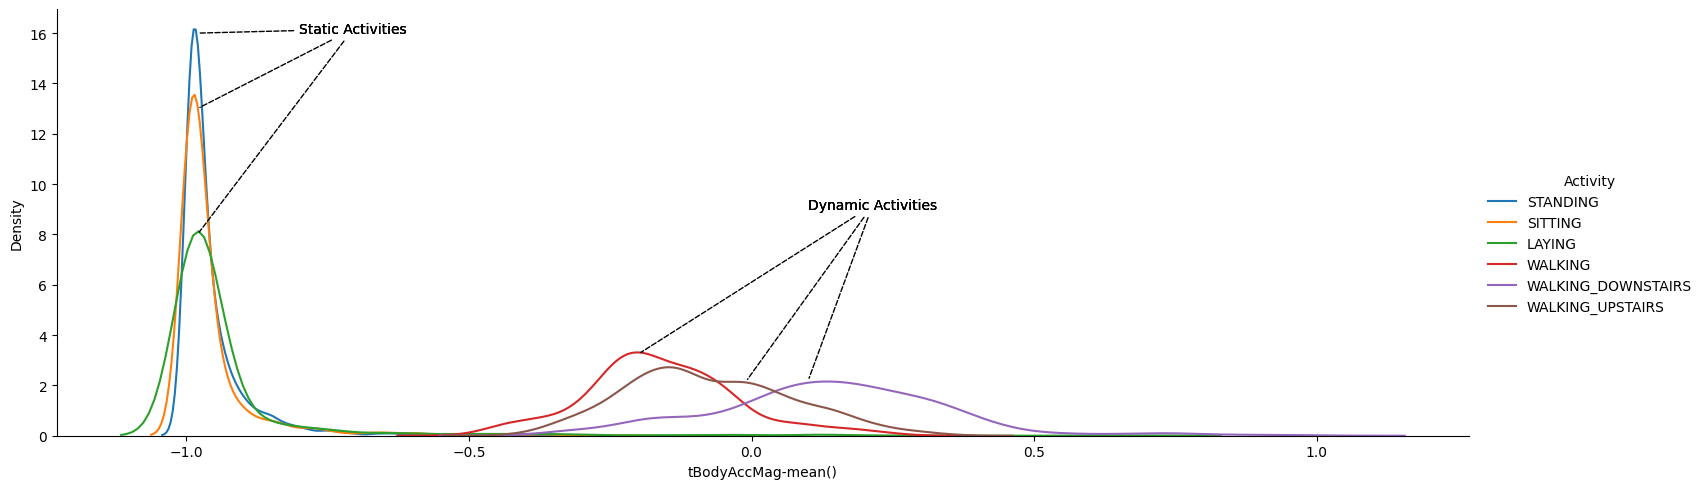

In [17]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height=5, aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy=(-.98, 8), xytext=(-.8, 16), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate("Static Activities", xy=(-.98, 13), xytext=(-.8, 16), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate("Static Activities", xy=(-.98, 16), xytext=(-.8, 16), arrowprops={'arrowstyle':'-', 'ls':'dashed'})

plt.annotate("Dynamic Activities", xy=(-.2, 3.25), xytext=(.1, 9), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate("Dynamic Activities", xy=(.1, 2.18), xytext=(.1, 9), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01, 2.15), xytext=(.1, 9), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.show()

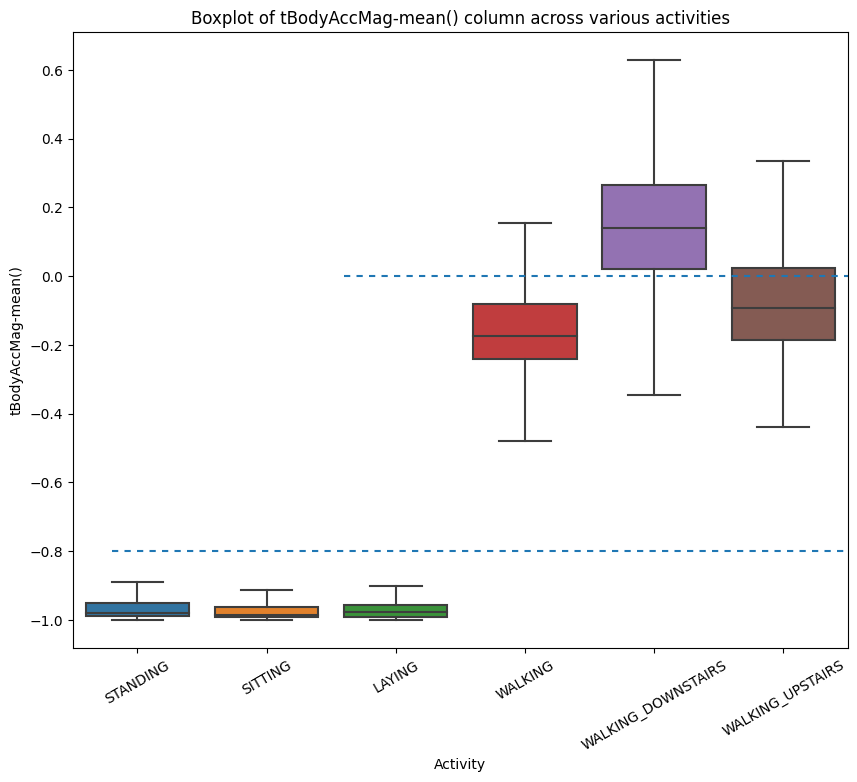

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Activity', y='tBodyAccMag-mean()', data=train, showfliers = False)
plt.title('Boxplot of tBodyAccMag-mean() column across various activities')
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3, 3))
plt.axhline(y = 0.0, xmin = 0.35, dashes = (3, 3))
plt.xticks(rotation = 30)
plt.show()

##### 4.a Analysing Angle between X-axis and gravityMean feature

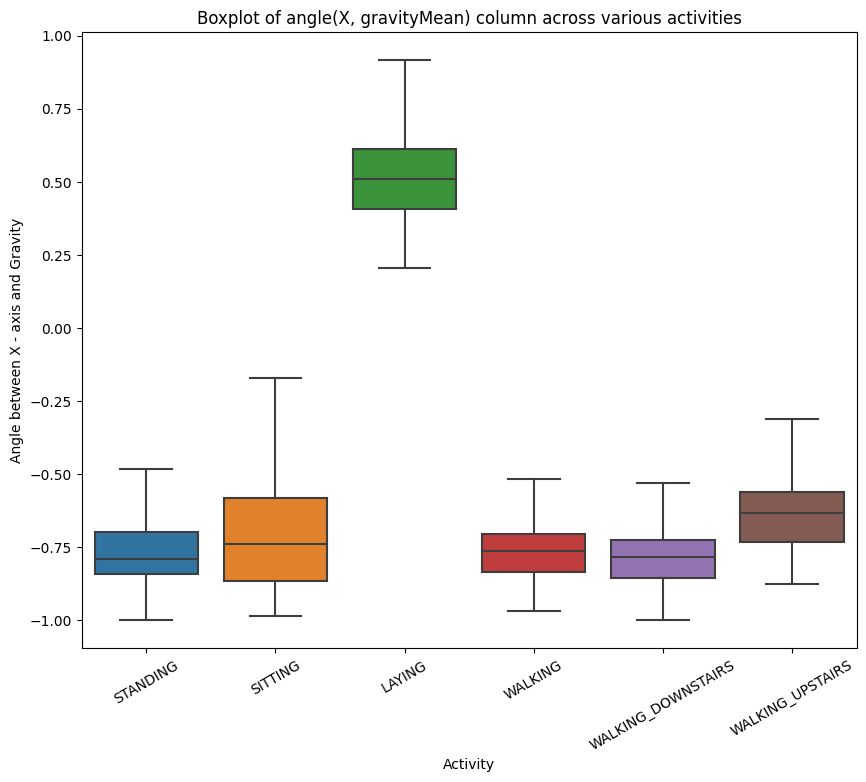

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Activity', y='angle(X,gravityMean)', data=train, showfliers = False)
plt.title('Boxplot of angle(X, gravityMean) column across various activities')
plt.ylabel('Angle between X - axis and Gravity')
plt.xticks(rotation = 30)
plt.show()

##### 4.a Analysing Angle between Y-axis and gravityMean feature

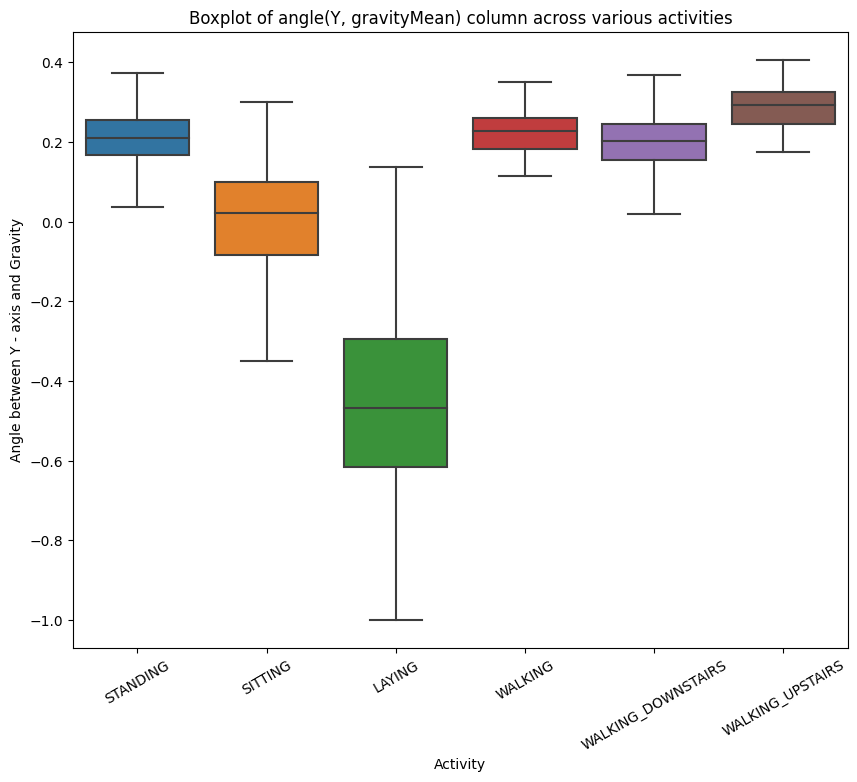

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Activity', y='angle(Y,gravityMean)', data=train, showfliers = False)
plt.title('Boxplot of angle(Y, gravityMean) column across various activities')
plt.ylabel('Angle between Y - axis and Gravity')
plt.xticks(rotation = 30)
plt.show()

#### Visulaising data using PCA

##### Using PCA data can be visulaized from a extremely high dimensional space to low dimensional space and still it retains lot of actual information. Given training data has 561 unique features, using visualize it to a 2D space

In [21]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [22]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

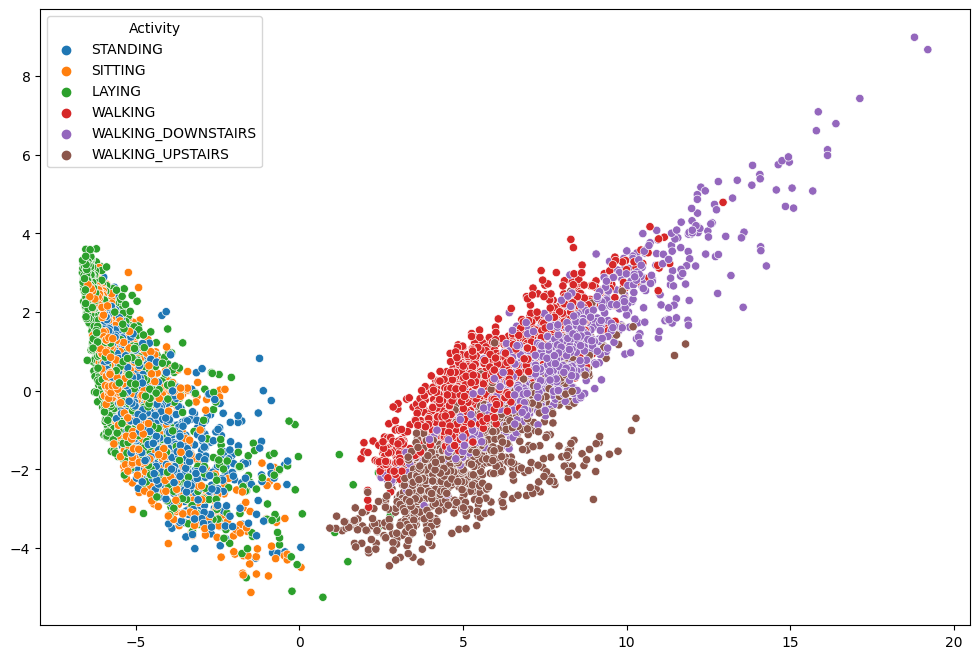

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue=train['Activity'])
plt.show()

#### Visulaising data using t-SNE

##### Using t-SNE data can be visualized from a extremely high dimensional space to low dimensional space and still it retains lots of actual information. Given training data has 561 unique features, using let's visualize it to a 2D space

In [24]:
x_for_tsne = train.drop(['subject', 'Activity'], axis=1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [25]:
tsne

array([[ 63.4906   , -39.7206   ],
       [ 13.5708065, -39.372986 ],
       [ 16.88333  , -37.352337 ],
       ...,
       [ 60.73749  ,  14.081628 ],
       [ 60.48153  ,  14.081899 ],
       [ 59.754375 ,  14.62647  ]], dtype=float32)

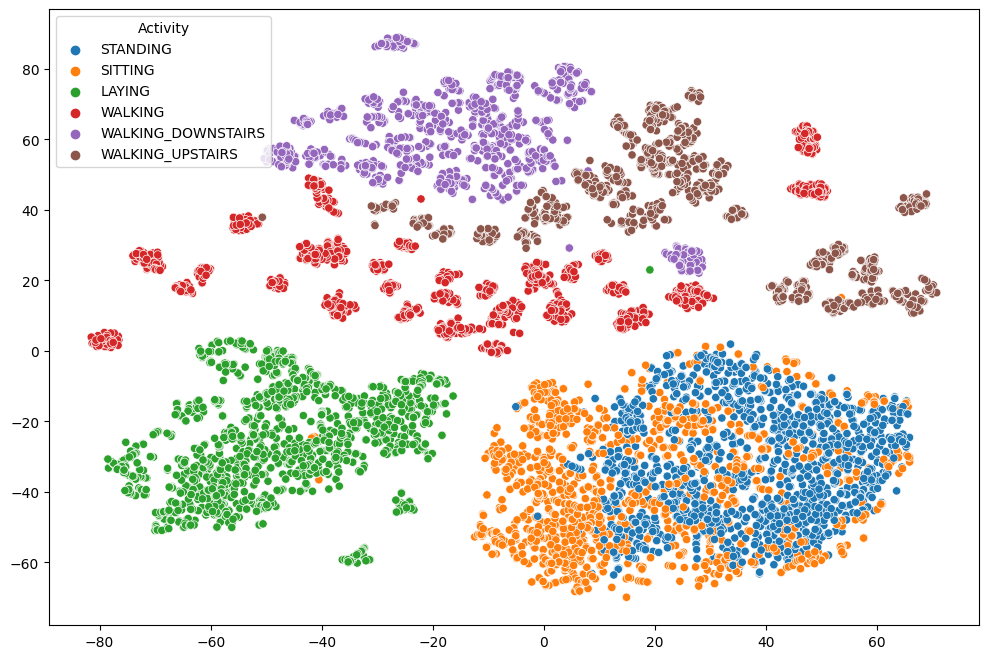

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue=train['Activity'])
plt.show()

### 5 ML Model

In [27]:
x_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity
x_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

In [28]:
print('Training data shape: ', x_train.shape)
print('Testing data shape: ', x_test.shape)

Training data shape:  (7352, 561)
Testing data shape:  (999, 561)


#### 5.a Logistic Regression Model with Hyperparameter tuning and cross validation

In [29]:
parameters = {'max_iter': [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5, random_state=42)
lr_classifier_rs.fit(x_train, y_train)
y_pred_lr = lr_classifier_rs.predict(x_test)

In [30]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print('Accuracy of the model using LR is: ', lr_accuracy)

Accuracy of the model using LR is:  0.954954954954955


In [31]:
#function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12, 8))  # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks = np.arange(cm.shape[1]),
    yticks = np.arange(cm.shape[0]),
    xticklabels = labels, yticklabels = labels,
    ylabel = 'True label',
    xlabel = 'Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]), ha='center', va = 'center', color = 'white' if cm[i, j]>thresh else 'black')
    fig.tight_layout()

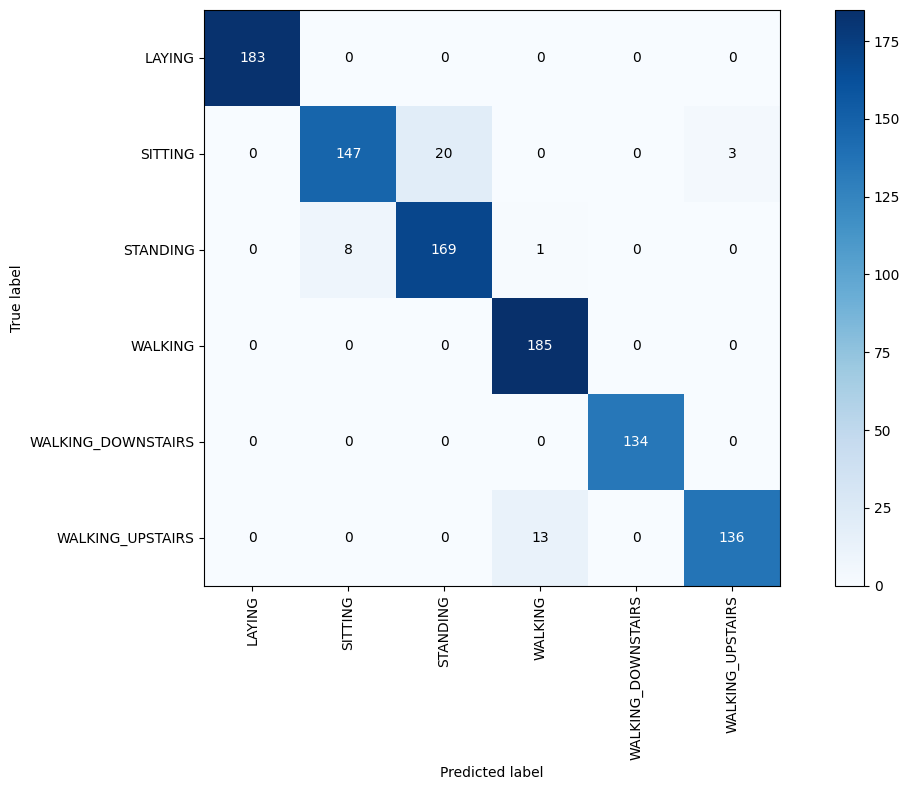

In [32]:
cm = confusion_matrix(y_test.values, y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [33]:
# function to get best random search attribute
def get_best_randomsearch_result(model):
    print('Best Estimator: ', model.best_estimator_)
    print('Best set of parameters: ', model.best_params_)
    # print('Best score: ', model.best_score_)

In [34]:
get_best_randomsearch_result(lr_classifier_rs)

Best Estimator:  LogisticRegression(max_iter=500)
Best set of parameters:  {'max_iter': 500}


#### 5.b Kernel SVM Model with Hyperparameter tuning and Cross Validation

In [38]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50, 25, 75]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv=3, random_state=42)
svm_rs.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50, 25, 75],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [39]:
y_pred = svm_rs.predict(x_test)

In [40]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred= y_pred)
print('Accuracy using kernel SVM: ', kernel_svm_accuracy)

Accuracy using kernel SVM:  0.965965965965966


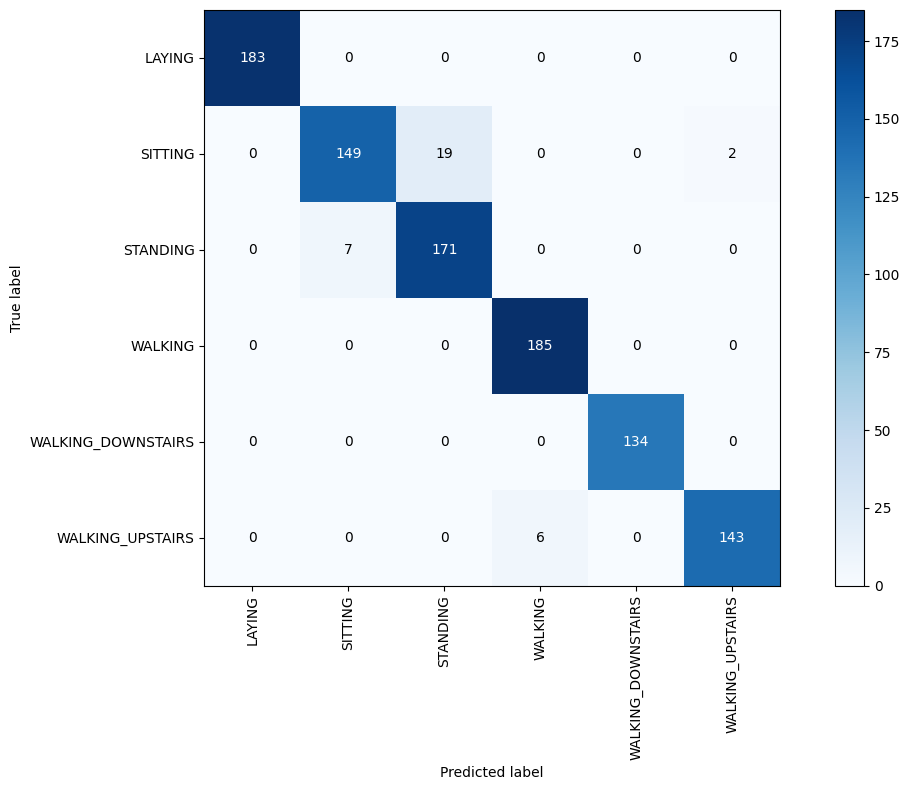

In [41]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [42]:
get_best_randomsearch_result(svm_rs)

Best Estimator:  SVC(C=50)
Best set of parameters:  {'kernel': 'rbf', 'C': 50}


#### 5.c Decision Tree Model with Hyperparameter tuning and cross validation

In [50]:
parameters = {
    'max_depth': np.arange(2, 20, 2)
}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions=parameters, cv = 3,random_state=42)
dt_classifier_rs.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=42)

In [46]:
y_pred = dt_classifier_rs.predict(x_test)

In [47]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy using Decision Tree: ', dt_accuracy)

Accuracy using Decision Tree:  0.8308308308308309


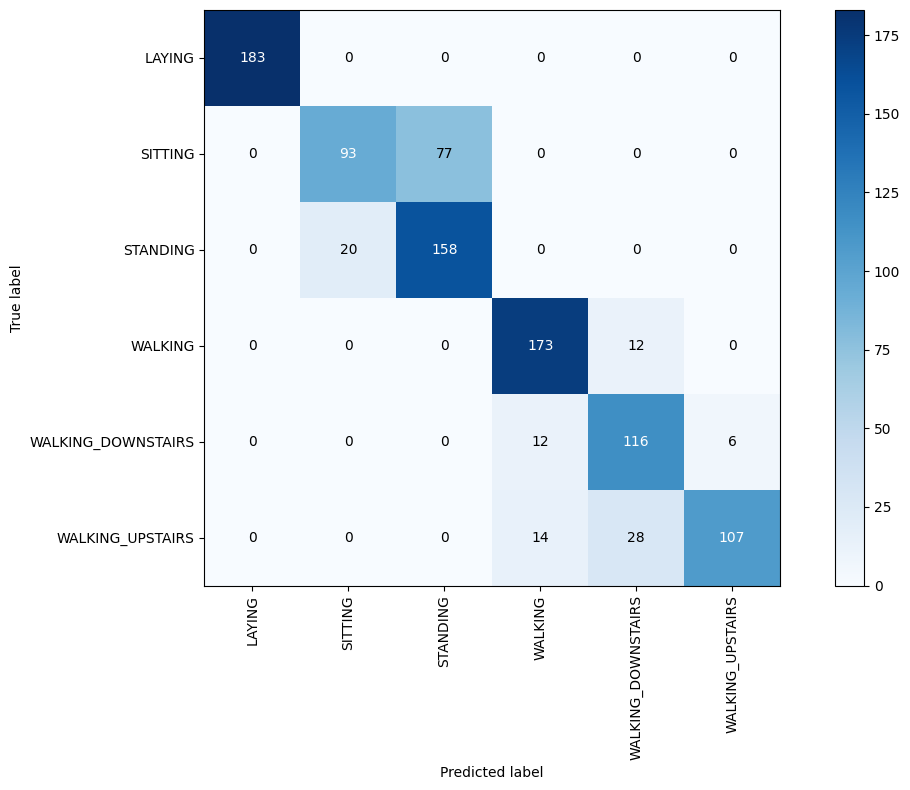

In [48]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [49]:
get_best_randomsearch_result(dt_classifier_rs)

Best Estimator:  DecisionTreeClassifier(max_depth=6)
Best set of parameters:  {'max_depth': 6}


#### 5.d Random Forest Model with Hyperparameter tuning and cross validaton

In [55]:
parameters = {
    'n_estimators': np.arange(20, 101, 10),
    'max_depth': np.arange(2, 20, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters, random_state=42)
rf_classifier_rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [56]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred= y_pred)
print('Accuracy using Random Forest Classifier: ', rf_accuracy)

Accuracy using Random Forest Classifier:  0.8308308308308309


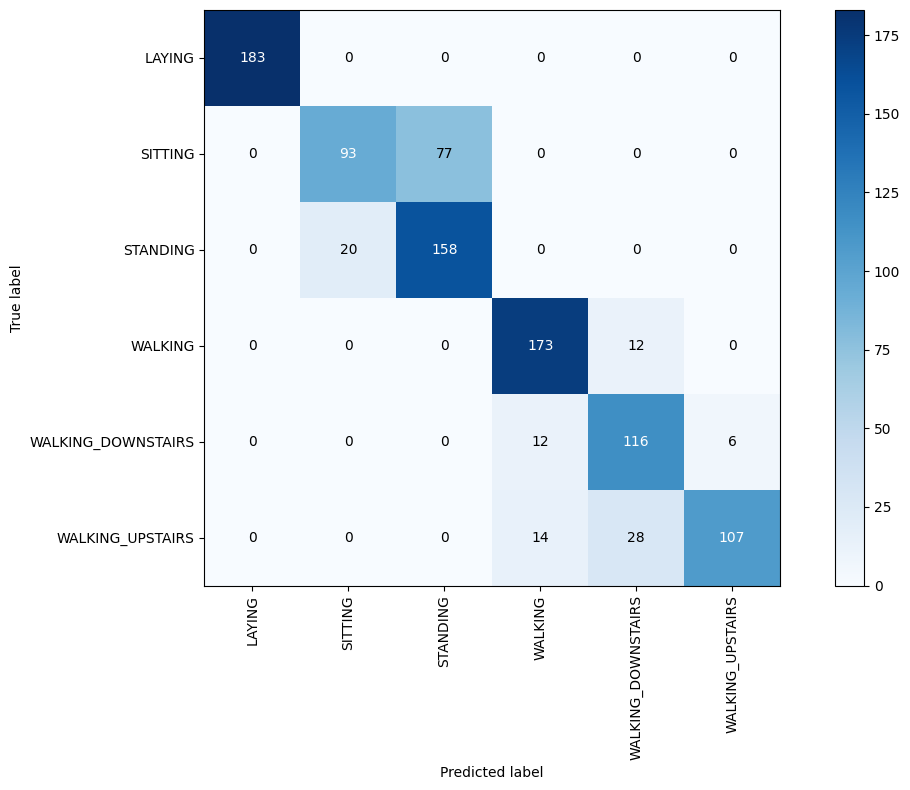

In [57]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [58]:
get_best_randomsearch_result(rf_classifier_rs)

Best Estimator:  RandomForestClassifier(max_depth=8, n_estimators=50)
Best set of parameters:  {'n_estimators': 50, 'max_depth': 8}
